# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 10 - Métricas**

- En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:


- Calculéis las métricas para vuestro modelo
  
- Discutid los resultados de las métricas y extraed conclusiones
  
- Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns



#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [6]:
df = pd.read_csv("datos/soci_econ_country_profiles_encoding.csv", index_col = 0)
df.head(2)

,country,region,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_map
0,Argentina,SouthAmerica,0.432582,-0.331263,0.131944,0.315638,0.258824,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.374915,0.605509,0.927114,-0.437736,-0.307692,4.246653,4.043640
1,Australia,Oceania,0.095085,-0.273292,-0.368056,0.487805,0.211765,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998,4.752619


In [7]:
# separamos la variable respuesta y las predictoras que usaremos para el modelo
X = df.drop(["restaurant_price_index_normal", 'country', 'region'], axis = 1)
y = df["restaurant_price_index_normal"]

In [8]:
# dividimos los datos en los conjuntos de entrenamiento (train) y de test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# iniciamos la regresión lineal
lr = LinearRegression(n_jobs=-1)
# fiteamos el modelo
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [10]:
# usamos el método predict() para hacer las predicciones
y_predict_train = lr.predict(x_train) # predicciones para los datos de entrenamiento
y_predict_test = lr.predict(x_test) # predicciones para los datos de test

In [11]:
# creamos un dataframe para comparar los datos reales y los predichos de cada conjunto (train y test)
df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
# unimos todo en un dataframe
df_resultados = pd.concat([df_train,df_test], axis = 0)
df_resultados.head()

,Real,Predicted,Set
34,3.232599,3.401407,Train
25,3.200753,3.320231,Train
3,3.906126,3.563881,Train
17,3.100294,2.970003,Train
40,3.176574,3.140247,Train


In [12]:
# creamos una columna con los errores/residuos
df_resultados['residuos'] = df_resultados['Real'] - df_resultados['Predicted']
df_resultados.head()

,Real,Predicted,Set,residuos
34,3.232599,3.401407,Train,-0.168808
25,3.200753,3.320231,Train,-0.119478
3,3.906126,3.563881,Train,0.342245
17,3.100294,2.970003,Train,0.130290
40,3.176574,3.140247,Train,0.036327


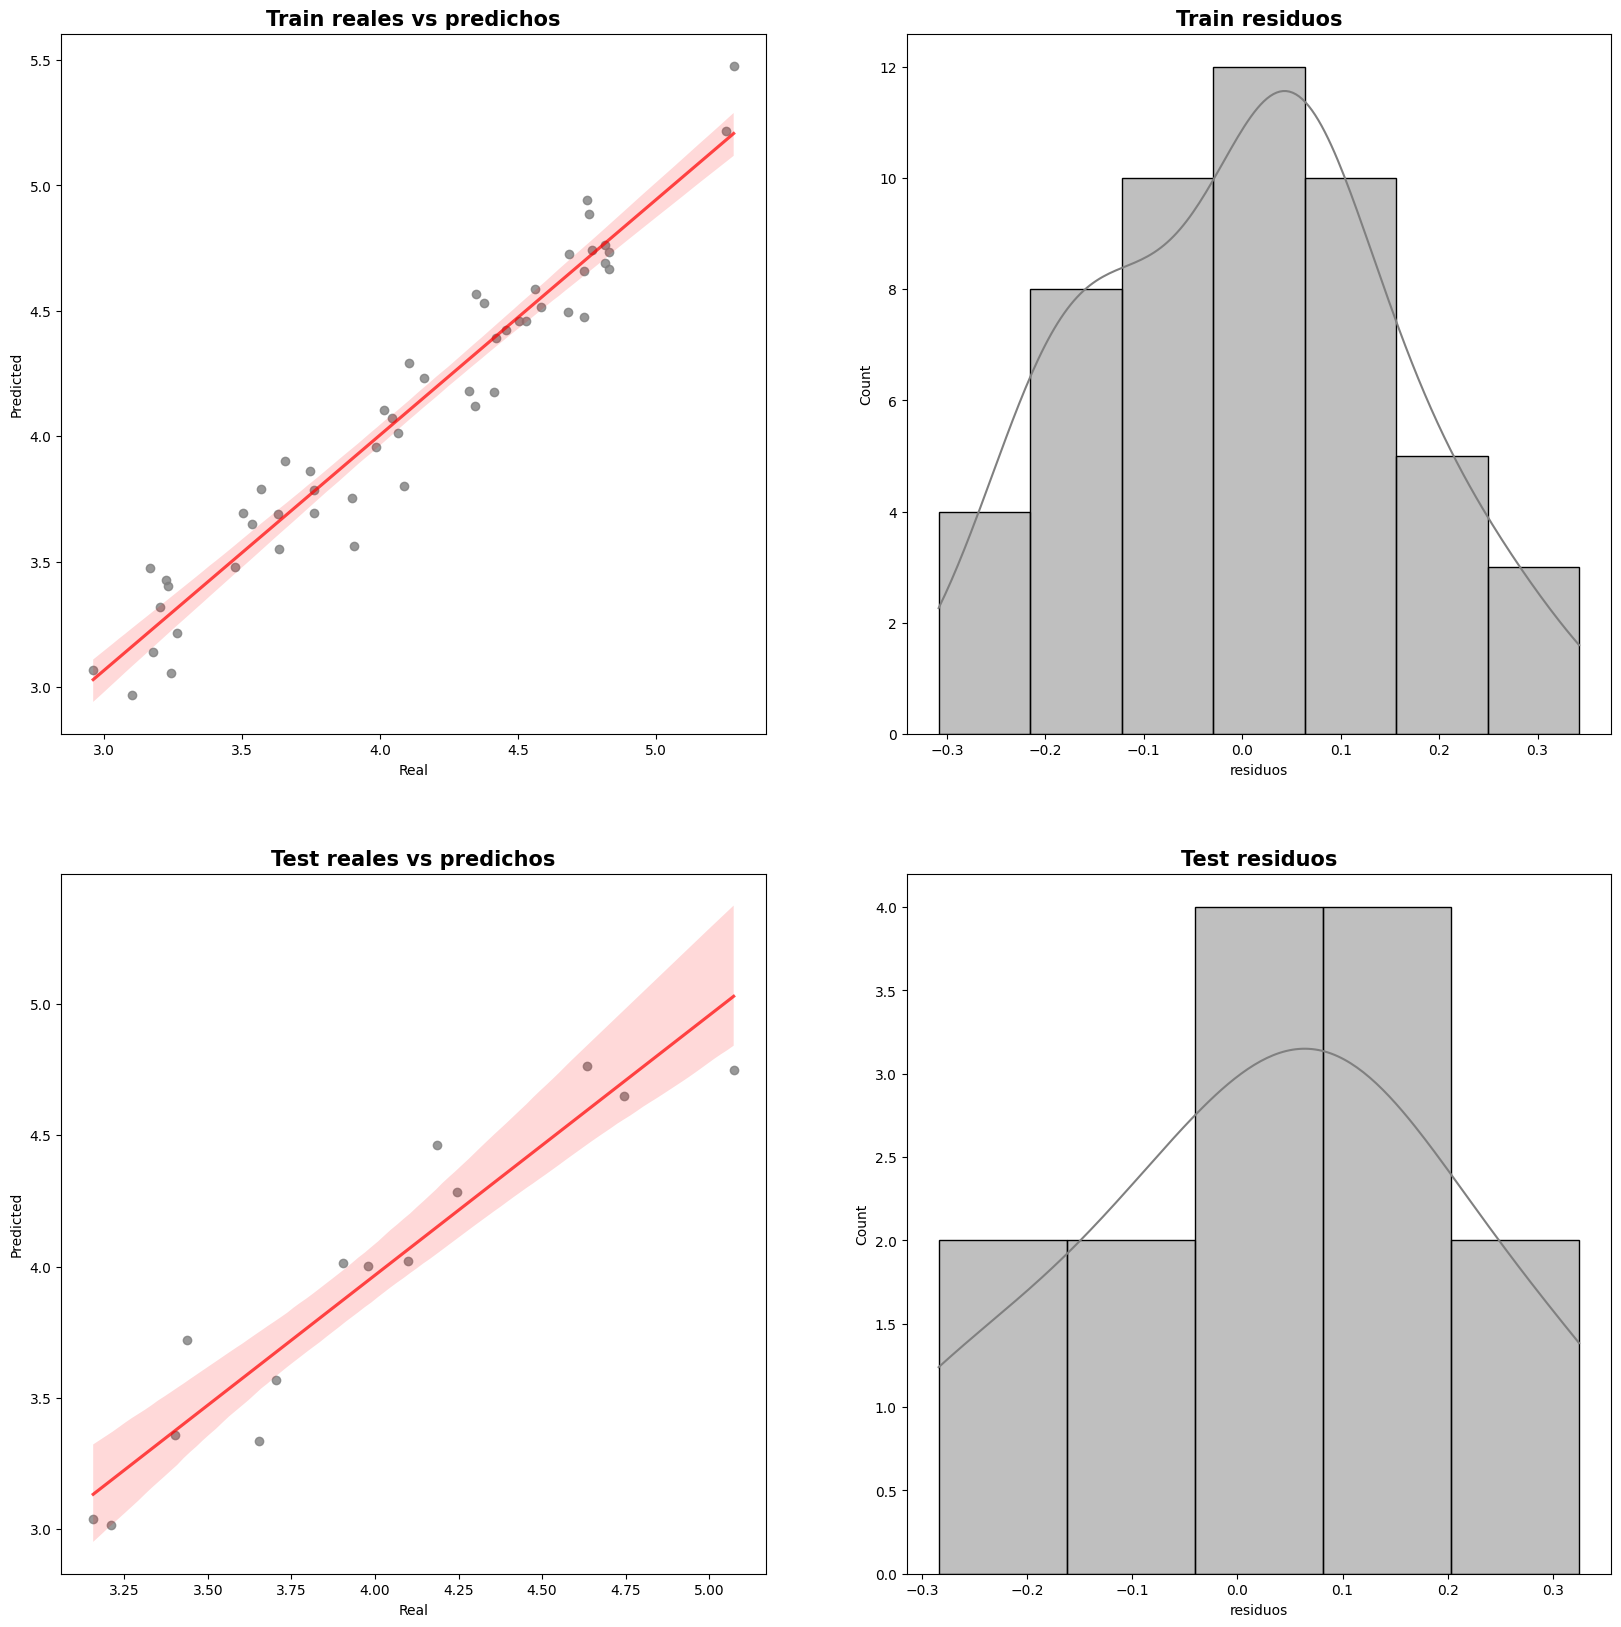

In [13]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

# ploteamos los reales vs los predichos
sns.regplot(data = df_resultados[df_resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })

sns.regplot(data = df_resultados[df_resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])

# ploteamos los residuos
sns.histplot(df_resultados[df_resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])

sns.histplot(df_resultados[df_resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [14]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.9386994358637114
El MAE es 0.12480697536929854
El MSE es 0.02262111278155095
EL RMSE es  0.15040316745850452
Para el conjunto test:---------------
El valor de r2 score es  0.8913536868718269
El MAE es 0.15444413934437715
El MSE es 0.03433184009780065
EL RMSE es  0.18528853201912052


In [15]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.154444,0.034332,0.185289,0.891354,test,Linear Regresion
1,0.124807,0.022621,0.150403,0.938699,train,LinearRegression


Conclusiones:

- En general, las métricas son buenas, ya que R2 es alto (entre un 89% y un 94% de la VR se explica por nuestras VPs).
  
- Los datos sugieren que nuestro modelo de ML se ajusta correctamente a los datos reales, ya que aunque el R2 de train sea más alto que el R2 de test, la diferenia es despreciable. Además, los valores de MAE, MSE y RMSE de train son ligeramente más bajos de los de test, es decir, no tanto como para considerar que el modelo esté sobreajustado. 